In [20]:
import tensorflow as tf
from tensorflow import keras
import glob
import random
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [21]:
digit_classifier = keras.models.load_model('./trained_models/digit_classifier.h5')

In [22]:
digit_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


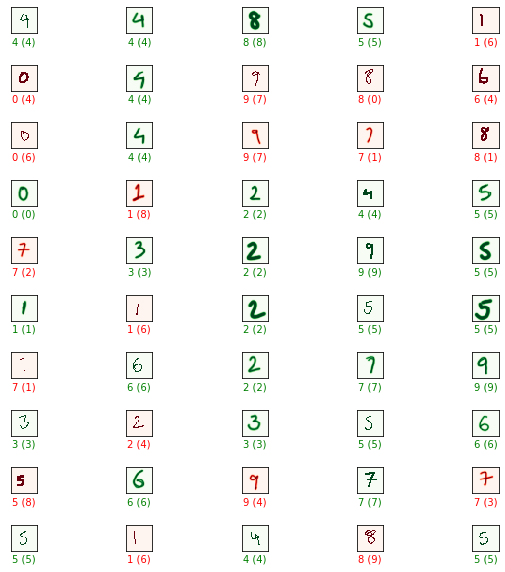

In [25]:
test_images = glob.glob('./test_digits/*')
count = 1
correct_count = 0
plt.figure(figsize = (10, 10))
plt.title("Predicted Label (Actual Label)", loc='center', pad = 2)
for i in range(50):
    test_image = test_images[i]
    test_label = os.path.basename(test_image)[0]
    
    img = mpimg.imread(test_image)
    img = 255*(1 - img[:, :, 0])
    
    prediction = str(np.argmax(digit_classifier.predict(img.reshape(1, 28, 28))))
    
    plt.subplot(10, 5, count)
    plt.subplots_adjust(hspace=1.2)
    
    if(test_label == prediction):
        cmap, color = 'Greens', 'green'
        correct_count = correct_count + 1
    else:
        cmap, color = 'Reds', 'red'
        color = 'red'
    
    plt.imshow(img, cmap = cmap)
    plt.xlabel(test_label + " ("+str(prediction)+")", color = color)
    plt.xticks([])
    plt.yticks([])
    
    count = count + 1

In [26]:
print("Accuracy percentage: ", 100.*correct_count/50., "%")

Accuracy percentage:  62.0 %


249.0


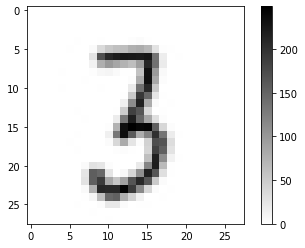

In [18]:
# Checking to see if the images look fine (artifact free, primarily)
plt.imshow(img, cmap = 'binary')
plt.colorbar()
print(np.max(img))

#### Let's do a sanity check by running the MNIST test dataset through the network

In [11]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [12]:
test_loss, test_accuracy = digit_classifier.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 18us/sample - loss: 48.7696 - acc: 0.9801


#### Sure enough, the accuracy on the test set is 98% - are we overfitting to the MNIST set?

In [13]:
train_loss, train_accuracy = digit_classifier.evaluate(train_images, train_labels)

60000/60000 [==============================] - 1s 15us/sample - loss: 0.7781 - acc: 0.9988


Similarly high performance on the training set

255


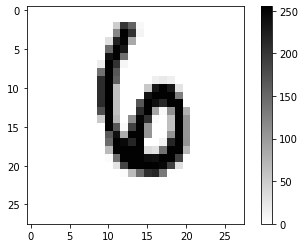

In [19]:
# What do MNIST images look like?
train_images.shape
index = random.randint(0, train_images.shape[0])
plt.imshow(train_images[index].reshape(28, 28), cmap = 'binary')
plt.colorbar()
print(np.max(train_images[index]))

### Let's retrain the model here, then plot it's accuracy over time

In [13]:
history = digit_classifier.fit(partial_x_train, partial_y_train, validation_data=(x_val, y_val), epochs = 20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 41us/sample - loss: 7.0097 - acc: 0.9937 - val_loss: 2.4825 - val_acc: 0.9971
Epoch 2/20
50000/50000 [==============================] - 2s 39us/sample - loss: 2.6976 - acc: 0.9966 - val_loss: 2.5348 - val_acc: 0.9969
Epoch 3/20
50000/50000 [==============================] - 2s 39us/sample - loss: 1.7579 - acc: 0.9973 - val_loss: 3.2146 - val_acc: 0.9957
Epoch 4/20
50000/50000 [==============================] - 2s 38us/sample - loss: 2.7387 - acc: 0.9966 - val_loss: 2.1462 - val_acc: 0.9977
Epoch 5/20
50000/50000 [==============================] - 2s 39us/sample - loss: 1.9593 - acc: 0.9973 - val_loss: 3.9309 - val_acc: 0.9958
Epoch 6/20
50000/50000 [==============================] - 2s 39us/sample - loss: 2.3233 - acc: 0.9972 - val_loss: 3.2055 - val_acc: 0.9963
Epoch 7/20
50000/50000 [==============================] - 2s 39us/sample - loss: 2.2058 - acc: 0.9970 - val_loss: 3.

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

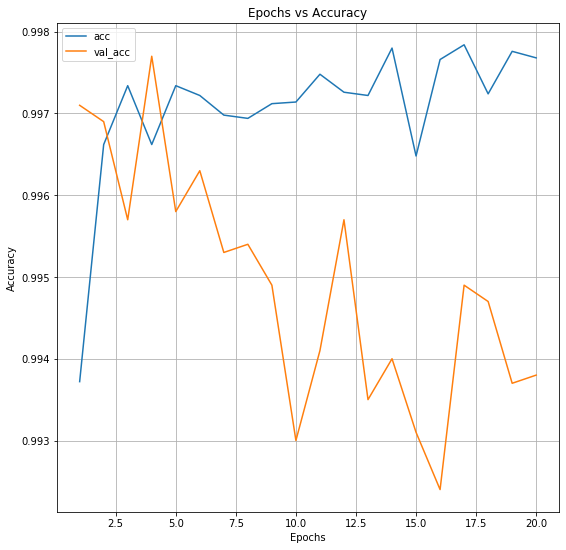

In [15]:
from matplotlib import pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(9, 9))
plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc, label = 'val_acc')
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

### Why not test on the network after re-training?

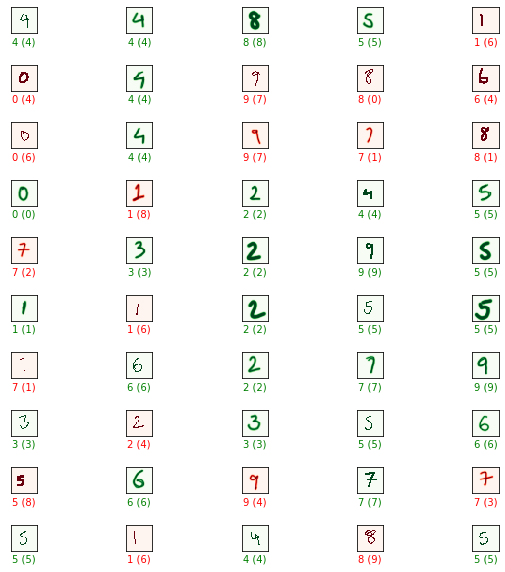

In [27]:
test_images = glob.glob('./test_digits/*')
count = 1
correct_count = 0
plt.figure(figsize = (10, 10))
plt.title("Predicted Label (Actual Label)", loc='center', pad = 2)
for i in range(50):
    test_image = test_images[i]
    test_label = os.path.basename(test_image)[0]
    
    image = mpimg.imread(test_image)
    
    img = mpimg.imread(test_image)
    img = 255*(1 - img[:, :, 0])
 
    prediction = str(np.argmax(digit_classifier.predict(img.reshape(1, 28, 28))))
    
    plt.subplot(10, 5, count)
    plt.subplots_adjust(hspace=1.2)
    
    if(test_label == prediction):
        cmap, color = 'Greens', 'green'
        correct_count = correct_count + 1
    else:
        cmap, color = 'Reds', 'red'
        color = 'red'
    
    plt.imshow(img, cmap = cmap)
    plt.xlabel(test_label + " ("+str(prediction)+")", color = color)
    plt.xticks([])
    plt.yticks([])
    
    count = count + 1

In [28]:
print("Accuracy percentage: ", 100.*correct_count/50., "%")

Accuracy percentage:  62.0 %


### After re-training, my network is doing worse?!

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
img = train_images[0].reshape(28, 28)

In [31]:
img.shape

(28, 28)

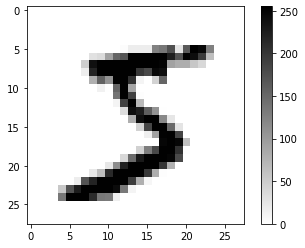

In [32]:
plt.imshow(img, cmap='binary')
plt.colorbar()